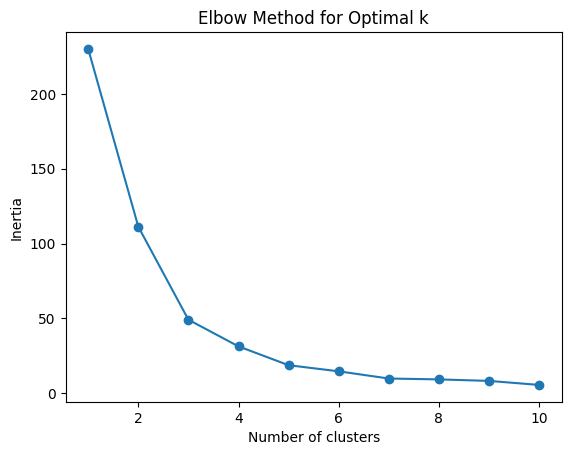

Cluster Counts:
Cluster
2    7
3    7
0    6
1    3
Name: count, dtype: int64

Centroids:
   FertilityRate  Ratio_MaletoFemale  PerFemEmployers  Agriculture   Industry  \
0       2.740000           32.340000            0.115    71.486667  11.203333   
1       2.090000           41.846667            0.410    62.360000  16.043333   
2       3.380000           29.678571            0.100    80.611429   8.034286   
3       2.284286           36.798571            0.140    65.438571  13.634286   

    Services  Wage&Salaried  ContrFamWorkers  OwnAccount  Vulnerable  
0  17.311667      21.648333        62.198333   16.043333   78.241667  
1  21.596667      28.333333        37.410000   33.850000   71.256667  
2  11.357143      19.138571        65.468571   15.294286   80.760000  
3  20.928571      19.395714        56.604286   23.861429   80.467143  


In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv("MLR2.csv")

# Преобразование столбца "FertilityRate" в числовой формат
df['FertilityRate'] = pd.to_numeric(df['FertilityRate'], errors='coerce')

# Отбрасываем строки с пропущенными значениями
df.dropna(inplace=True)

# Выбираем только нужные столбцы для кластеризации
X = df[['FertilityRate', 'Ratio_MaletoFemale', 'PerFemEmployers', 'Agriculture', 'Industry', 'Services',
        'Wage&Salaried', 'ContrFamWorkers', 'OwnAccount', 'Vulnerable']]

# Масштабируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Определение оптимального количества кластеров
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Визуализация методом локтя
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Построение модели кластеризации с оптимальным количеством кластеров
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Получение меток кластеров и добавление их к исходным данным
df['Cluster'] = kmeans.labels_

# Подсчет количества вхождений в кластеры
cluster_counts = df['Cluster'].value_counts()

# Вывод центроидов кластеров
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)

# Вывод результатов
print("Cluster Counts:")
print(cluster_counts)
print("\nCentroids:")
print(centroids)
